In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("Fish.csv")


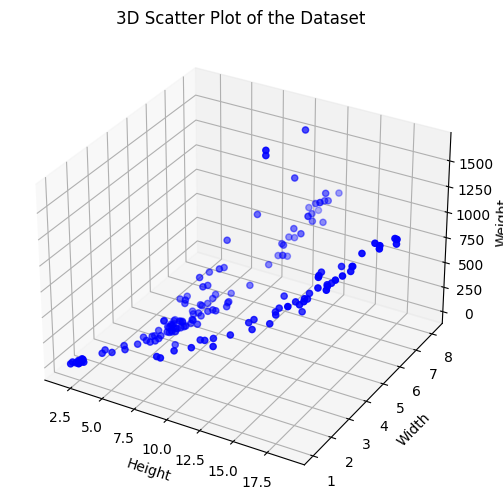

In [3]:
x = df[['Height', 'Width']].values
y = df['Weight'].values

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], y, c='b', marker='o')

ax.set_xlabel('Height')
ax.set_ylabel('Width')
ax.set_zlabel('Weight')

ax.set_title('3D Scatter Plot of the Dataset')

plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  159 non-null    float64
 1   Width   159 non-null    float64
 2   Weight  159 non-null    float64
dtypes: float64(3)
memory usage: 3.9 KB


In [5]:
df.isnull().count()
df.isnull().sum()

Height    0
Width     0
Weight    0
dtype: int64

In [6]:
# there are no null values
df.columns

df.fillna(df.mean(),inplace =True)            # filling all NUll/NA with mean
df['Weight'] = df['Weight'].replace(0,df.Weight.mean())   # 0 is not possible as weight



## Normalizing data

In [7]:
x = df.drop(['Weight'],axis =1)
x_ = df.drop(['Weight'],axis =1)
y = df.Weight


## Normalizing data

In [8]:
x_['Height'] = (x_['Height'] - np.mean(x_['Height']))/(np.std(x_['Height']))
x_['Width'] = (x_['Width'] - np.mean(x_['Width']))/(np.std(x_['Width']))

x_normalized = x_

In [9]:
split_ratio = 0.8                                 #split ratio 

nos = len(x_normalized)                                      #length of data
split_index = int(split_ratio * nos)


# shuffling data
x_normalized = np.array(x_normalized)
np.random.seed(12)
shuffled = np.random.permutation(nos)
x_shuffled = x_normalized[shuffled]
y_shuffled = y[shuffled]



In [10]:
# test train split

x_train = x_shuffled[:split_index]
y_train = y_shuffled[:split_index]
x_test = x_shuffled[split_index:]
y_test = y_shuffled[split_index:]

In [13]:
pd.DataFrame(x_normalized).describe()

,0,1
count,1.590000e+02,1.590000e+02
mean,4.468822e-17,-2.793014e-16
std,1.003160e+00,1.003160e+00
min,-1.695083e+00,-2.005294e+00
25%,-7.082613e-01,-6.140072e-01
50%,-2.773402e-01,-1.005570e-01
75%,7.945562e-01,6.944472e-01
max,2.337161e+00,2.216321e+00


In [14]:
def polynomial_features(x, degree):                  
    height_x = x[:,0]
    width_x =  x[:,1]

    height_x = np.column_stack([height_x**i for i in range(degree + 1)])
    width_x = np.column_stack([width_x**i for i in range(degree + 1)])

    b =np.concatenate([height_x, width_x], axis = 1)
    result = np.delete(b, degree+1 , axis=1)
    return result



In [15]:
polynomial_features(x_train,9).shape

(127, 19)

# a.

In [16]:
def cost_function(x,y,w):
    pred = np.dot(x,w)
    actual = y
    squared_error = np.square(actual- pred)
    mean_squared_error = np.mean(squared_error)
    root_mean_squared_error = np.sqrt(mean_squared_error)

    return root_mean_squared_error
   

def rmse(actual,pred):
    squared_error = np.square(actual- pred)
    mean_squared_error = np.mean(squared_error)

    return np.sqrt(mean_squared_error)
    




In [17]:
def gradient_descent(x, y, w, lr, epochs):
    cost_values = []

    n = x.shape[0]

    for i in range(epochs):
        

        derivative = -np.dot(x.T,(y - np.dot(x,w) ))/n
        
        #for i in range(x.shape[1]):
            #w[i] = w[i] - lr * (1/n) * np.sum((pred_values - y) * x[:, i])
        w = w - (lr * derivative)
        
        cost_value = cost_function(x, y, w)

        

    return w, cost_values


In [18]:
x_grid = np.linspace(np.min(x_shuffled[:, 0]), np.max(x_shuffled[:, 0]), 100)
y_grid = np.linspace(np.min(x_shuffled[:, 1]), np.max(x_shuffled[:, 1]), 100)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

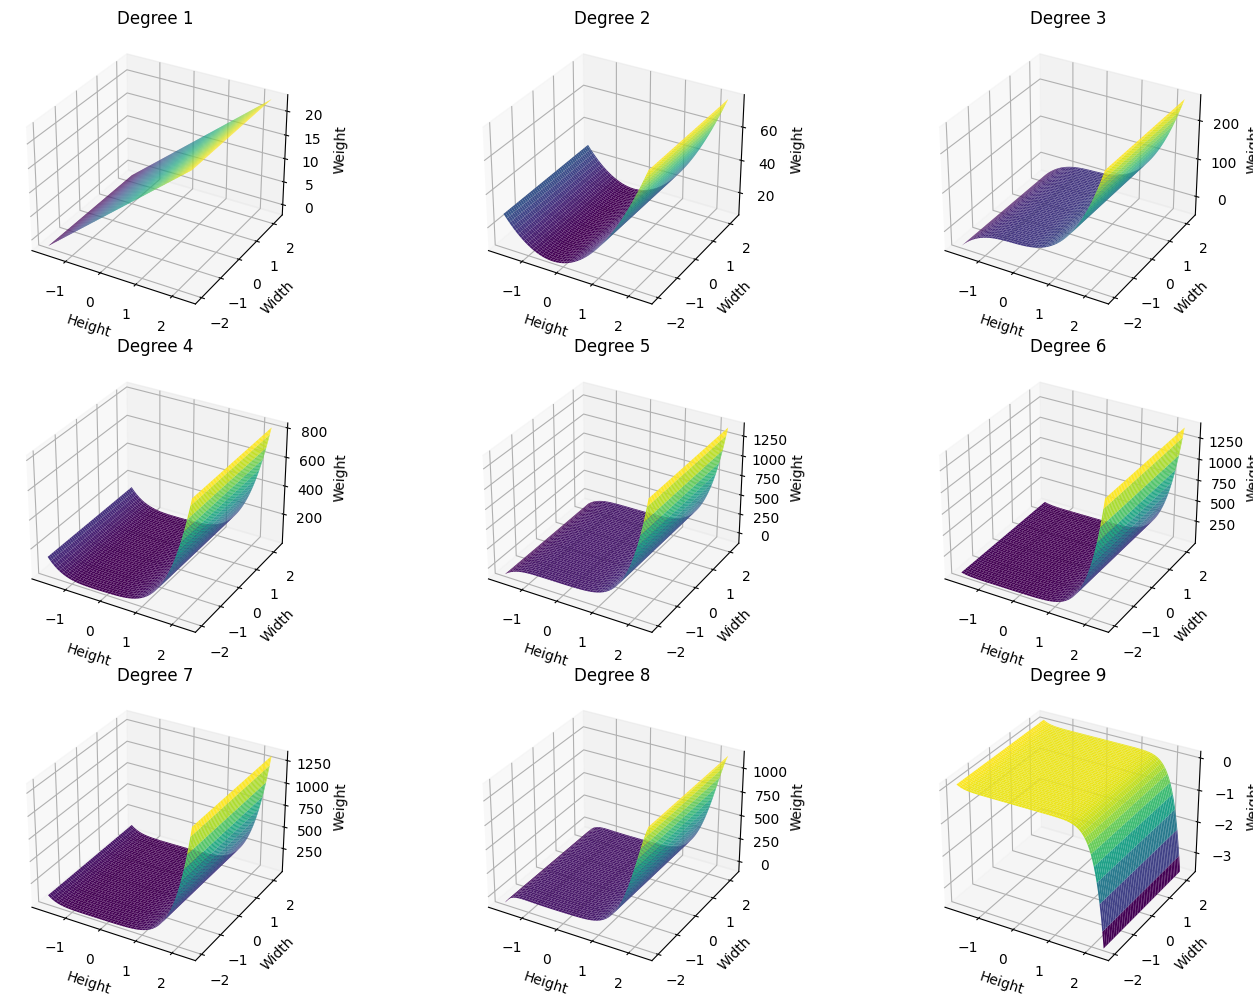

In [19]:
num_epochs = 1000
degrees = list(range(1, 10))
learning_rate = 0.00001


train_mse_list = []
test_mse_list = []

train_mse_epoch = []


fig = plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    # Create polynomial features
    x_poly_train = np.column_stack([x_train[:, 0] ** d for d in range(degree + 1)])
    x_poly_test = np.column_stack([x_test[:, 0] ** d for d in range(degree + 1)])
    x_grid_poly = np.column_stack([x_grid.ravel() ** d for d in range(degree + 1)])

    # Initialize weights randomly
    np.random.seed(0)
    weights = np.random.rand(degree + 1)

    epoch_train_mse = []

    for epoch in range(num_epochs):
        y_grid_pred = x_grid_poly @ weights
        y_train_pred = x_poly_train @ weights

        train_mse = np.mean((y_train_pred - y_train) ** 2)
        epoch_train_mse.append(train_mse)

        gradient = -(2 / len(y_train)) * (x_poly_train.T @ (y_train - y_train_pred))

        weights -= learning_rate * gradient

    train_mse_epoch.append(epoch_train_mse)
    y_train_pred = x_poly_train @ weights
    y_test_pred = x_poly_test @ weights

    z_grid = y_grid_pred.reshape(x_grid.shape)


    train_mse = np.mean((y_train_pred - y_train) ** 2)
    test_mse = np.mean((y_test_pred - y_test) ** 2)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

    ax = fig.add_subplot(3, 3, i + 1, projection='3d')
    ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')
    ax.set_xlabel('Height')
    ax.set_ylabel('Width')
    ax.set_zlabel('Weight')
    ax.set_title(f'Degree {degree}')

plt.tight_layout()
plt.show()

In [20]:
cost_plot_training_degree =[]
cost_plot_test_degree=[]


degree_plot=[]
degrees=9

cost_plot_test_epochs =[]
cost_plot_training_epochs=[]
w_ = []
    # appending 0 for 0 degree which isnt needed

learning_rate = 0.001   # best learning rate found from above
epochs = 5000


In [21]:
for i in range(0,6+1):
    degree_plot.append(i)
    

    a_train = polynomial_features(x_train,i)
    a_test = polynomial_features(x_test,i)
    
     



    w =np.zeros(a_train.shape[1],)
    

    w_new, cost_new = gradient_descent(a_train, y_train , w,learning_rate,epochs)
    cost_plot_training_epochs.append(cost_new)

    w_.append(w_new)

    y_test_pred = np.dot(a_test,w_new)
    c_test = cost_function(a_test,y_test,w_new)
    cost_plot_test_degree.append(c_test)
    
    
    c_train  = cost_function(a_train,y_train,w_new) 
    cost_plot_training_degree.append(c_train)
    
    
    

In [22]:
# training degree 7,8 and 9 separately so that we can change hyerparameters of these separately

learning_rate = 0.00001   
epochs = 50000

In [23]:

for i in range(7,degrees+1):
    degree_plot.append(i)
    

    a_train = polynomial_features(x_train,i)
    a_test = polynomial_features(x_test,i)
    
     



    w =np.zeros(a_train.shape[1],)
    

    w_new, cost_new = gradient_descent(a_train, y_train , w,learning_rate,epochs)
    cost_plot_training_epochs.append(cost_new)

    w_.append(w_new)

    y_test_pred = np.dot(a_test,w_new)
    c_test = cost_function(a_test,y_test,w_new)
    cost_plot_test_degree.append(c_test)
    
    
    c_train  = cost_function(a_train,y_train,w_new) 
    cost_plot_training_degree.append(c_train)
    
    
    



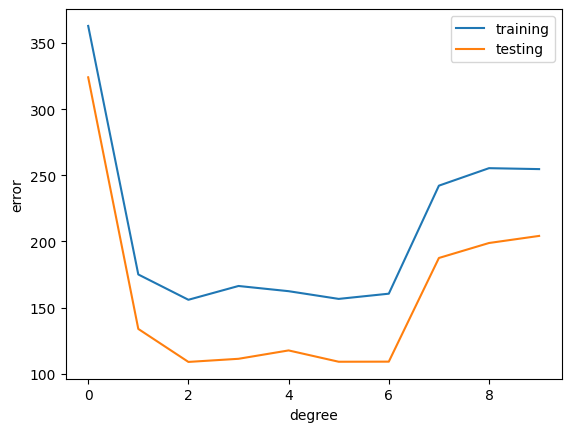

In [24]:

plt.plot(degree_plot, cost_plot_training_degree,label="training")
plt.legend("t")
plt.plot(degree_plot, cost_plot_test_degree,label="testing")
plt.xlabel("degree")
plt.ylabel("error")
plt.legend()

# we can observe from the graph given below is that best degree is 2. 

In [25]:
best_degree = np.argmin(cost_plot_test_degree)   
print("best fit degree :", best_degree)



best fit degree : 2


## Regularization models

In [26]:
degree = 2    # its degree is 2
a_train = polynomial_features(x_train,degree)
a_test = polynomial_features(x_test,degree)



# w = np.zeros(a_train.shape[1],)
q = [0.5 , 1 , 2 , 4] 


# w =np.random.rand(a_train.shape[1],)
w = np.random.uniform(1, 2, a_train.shape[1])
w

array([1.79172504, 1.52889492, 1.56804456, 1.92559664, 1.07103606])

In [27]:
 def mini_batch_gradient_descent(x, y, w, lr, epochs,l,q, batch_size):      # l is lambda here 
    cost_values = []

    n = x.shape[0]

    for i in range(epochs):


        for i in range(0, n, batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]

            
            

            
            pred_values = np.dot(x_batch,w)
            error = y_batch - pred_values

            derivative = -np.dot(x_batch.T, error)/batch_size  + (l* q* (w**(q-1)))/2
        
            #for i in range(x.shape[1]):
            #w[i] = w[i] - lr * (1/n) * np.sum((pred_values - y) * x[:, i])
            w = w - (lr * derivative)   # updating parameters
        
        cost_value = cost_function(x, y, w)
        cost_values.append(cost_value)

        
            
        

    return w, cost_values



## regularization model for q = 0.5

In [28]:
w = np.random.uniform(0, 1, a_train.shape[1])
w

la = 0.001

w_new_batch, cost_batch      =      mini_batch_gradient_descent(a_train,y_train,w, 0.00001, 500,la , 0.5,159)          # batch gradient descent       
w_new_stochastic, cost_stochastic = mini_batch_gradient_descent(a_train,y_train,w, 0.00001, 500,la ,0.5,1)             # batch size = 1  

In [29]:
y_test_pred_stochastic = np.dot(a_test,w_new_stochastic)
y_train_pred_stochastic = np.dot(a_train,w_new_stochastic)
a_test = polynomial_features(x_test,2)
y_test_pred_batch = np.dot(a_test,w_new_batch)
y_train_pred_batch = np.dot(a_train,w_new_batch)

In [30]:
print("For batch   gradient   descent  ","test error :",rmse(y_test_pred_batch,y_test), "train error" , rmse(y_train_pred_batch,y_train))
print("For stochastic gradient descent ","test error :",rmse(y_test_pred_stochastic,y_test), "train error" , rmse(y_train_pred_stochastic,y_train))


For batch   gradient   descent   test error : 485.8659487629732 train error 537.8302128000937
For stochastic gradient descent  test error : 204.06004116590796 train error 248.81855016985648


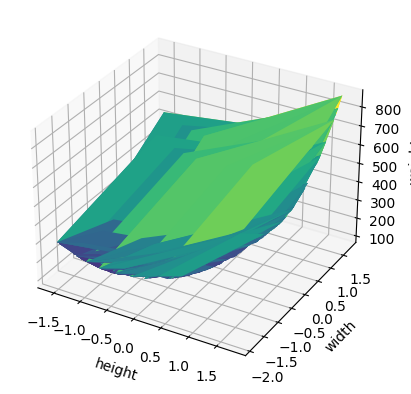

In [31]:

a_test = polynomial_features(x_test,2)



x = x_test[:,0]
y = x_test[:,1]


X, Y = np.meshgrid(x, y)


Z = w_new_stochastic[0] + (w_new_stochastic[1]*X) +  (w_new_stochastic[2]*(X**2)) +  (w_new_stochastic[2]*Y) +  (w_new_stochastic[2]*(Y**2))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')


ax.set_xlabel('height')
ax.set_ylabel('width')
ax.set_zlabel('weight')


plt.show()


## regularization model for q = 1

In [32]:
w = np.random.uniform(1, 2, a_train.shape[1])
w
q = 1
la = 0.001

w_new_batch, cost_batch = mini_batch_gradient_descent(a_train,y_train,w, 0.00001, 5000,la , q,159)          # batch gradient descent       
w_new_stochastic, cost_stochastic = mini_batch_gradient_descent(a_train,y_train,w, 0.001, 5000,la , q,1)  # batch size = 1  

In [33]:
y_test_pred_stochastic = np.dot(a_test,w_new_stochastic)
y_train_pred_stochastic = np.dot(a_train,w_new_stochastic)

y_test_pred_batch = np.dot(a_test,w_new_batch)
y_train_pred_batch = np.dot(a_train,w_new_batch)

In [34]:
print("For batch   gradient   descent  ","test error :",rmse(y_test_pred_batch,y_test), "train error" , rmse(y_train_pred_batch,y_train))
print("For stochastic gradient descent ","test error :",rmse(y_test_pred_stochastic,y_test), "train error" , rmse(y_train_pred_stochastic,y_train))


For batch   gradient   descent   test error : 439.2802405358889 train error 485.8430511668718
For stochastic gradient descent  test error : 107.60775973133437 train error 151.62742934533676


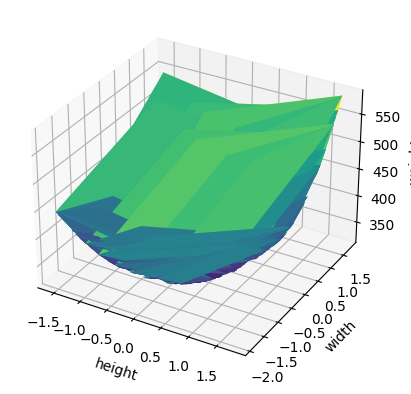

In [35]:

a_test = polynomial_features(x_test,2)



x = x_test[:,0]
y = x_test[:,1]


X, Y = np.meshgrid(x, y)


Z = w_new_stochastic[0] + (w_new_stochastic[1]*X) +  (w_new_stochastic[2]*(X**2)) +  (w_new_stochastic[2]*Y) +  (w_new_stochastic[2]*(Y**2))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')


ax.set_xlabel('height')
ax.set_ylabel('width')
ax.set_zlabel('weight')


plt.show()


## ragularization model for q =2

In [36]:
w = np.random.uniform(1, 2, a_train.shape[1])
w
q=2

la = 0.001

w_new_batch, cost_batch = mini_batch_gradient_descent(a_train,y_train,w, 0.00001, 500,la , q,159)          # batch gradient descent       
w_new_stochastic, cost_stochastic = mini_batch_gradient_descent(a_train,y_train,w, 0.00001, 500,la , q,1)  # batch size = 1  

In [37]:
y_test_pred_stochastic = np.dot(a_test,w_new_stochastic)
y_train_pred_stochastic = np.dot(a_train,w_new_stochastic)

y_test_pred_batch = np.dot(a_test,w_new_batch)
y_train_pred_batch = np.dot(a_train,w_new_batch)

In [38]:
print("For batch   gradient   descent  ","test error :",rmse(y_test_pred_batch,y_test), "train error" , rmse(y_train_pred_batch,y_train))
print("For stochastic gradient descent ","test error :",rmse(y_test_pred_stochastic,y_test), "train error" , rmse(y_train_pred_stochastic,y_train))


For batch   gradient   descent   test error : 482.6810700532603 train error 534.2411279935557
For stochastic gradient descent  test error : 203.60884222951086 train error 248.37538465606394


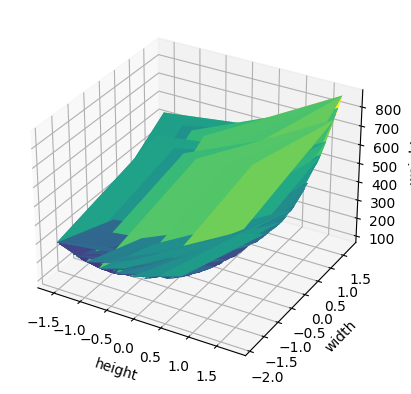

In [39]:

a_test = polynomial_features(x_test,2)



x = x_test[:,0]
y = x_test[:,1]


X, Y = np.meshgrid(x, y)


Z = w_new_stochastic[0] + (w_new_stochastic[1]*X) +  (w_new_stochastic[2]*(X**2)) +  (w_new_stochastic[2]*Y) +  (w_new_stochastic[2]*(Y**2))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')


ax.set_xlabel('height')
ax.set_ylabel('width')
ax.set_zlabel('weight')


plt.show()


## regularization model for  q =4

In [40]:
# w = np.random.uniform(0, 2, a_train.shape[1])

w =np.zeros(a_train.shape[1],)
w
q = 4

la = 0.00001

w_new_batch, cost_batch = mini_batch_gradient_descent(a_train,y_train,w, 0.00001, 5000,la , q,159)          # batch gradient descent       
w_new_stochastic, cost_stochastic = mini_batch_gradient_descent(a_train,y_train,w, 0.00001, 500,la , q,1)  # batch size = 1  

In [41]:
y_test_pred_stochastic = np.dot(a_test,w_new_stochastic)
y_train_pred_stochastic = np.dot(a_train,w_new_stochastic)

y_test_pred_batch = np.dot(a_test,w_new_batch)
y_train_pred_batch = np.dot(a_train,w_new_batch)

In [42]:
print("For batch   gradient   descent  ","test error :",rmse(y_test_pred_batch,y_test), "train error" , rmse(y_train_pred_batch,y_train))
print("For stochastic gradient descent ","test error :",rmse(y_test_pred_stochastic,y_test), "train error" , rmse(y_train_pred_stochastic,y_train))


For batch   gradient   descent   test error : 443.6609943791815 train error 490.668470970188
For stochastic gradient descent  test error : 211.98231213892342 train error 255.5438844229332


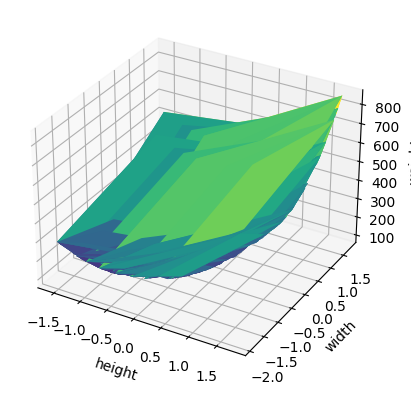

In [43]:

a_test = polynomial_features(x_test,2)



x = x_test[:,0]
y = x_test[:,1]


X, Y = np.meshgrid(x, y)


Z = w_new_stochastic[0] + (w_new_stochastic[1]*X) +  (w_new_stochastic[2]*(X**2)) +  (w_new_stochastic[2]*Y) +  (w_new_stochastic[2]*(Y**2))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis')


ax.set_xlabel('height')
ax.set_ylabel('width')
ax.set_zlabel('weight')


plt.show()


# Among different models trained with different values of q, the model with q = 1, lambda = 0.001 gives the least error when trained with stochastic gradient method.
